In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
users = pd.read_csv("dataset/Users.csv")
books = pd.read_csv("dataset/Books.csv")
ratings = pd.read_csv("dataset/Ratings.csv")

C:\Users\Abhay\AppData\Local\Temp\ipykernel_16452\3001990596.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("dataset/Books.csv")


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [6]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [7]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
sorted(ratings["Book-Rating"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

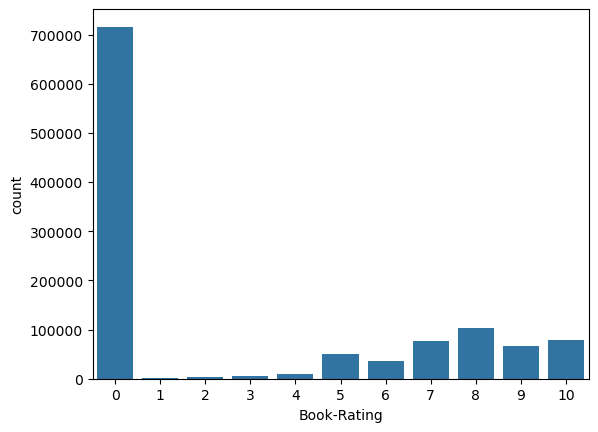

In [9]:
# rating_wo_0 = ratings[ratings["Book-Rating"] != 0]
color = sb.color_palette()[0]
sb.countplot(data = ratings,x = "Book-Rating", color=color)
plt.show()

In [10]:
book_rated = ratings["ISBN"].value_counts()
# sb.countplot(data = book_rated, x = 'ISBN')
most_reviewed_books = book_rated[:10]

In [11]:
for ind in books.index:
    if books["ISBN"][ind] in most_reviewed_books:
        print(books["Book-Title"][ind])

Wild Animus
Angels &amp; Demons
A Painted House
The Secret Life of Bees
The Lovely Bones: A Novel
The Red Tent (Bestselling Backlist)
The Da Vinci Code
Divine Secrets of the Ya-Ya Sisterhood: A Novel
Snow Falling on Cedars


## Popularity Based

In [12]:
books_with_rating = ratings.merge(books, on='ISBN')
books_with_rating[:10]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
6,28266,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
8,39002,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [13]:
book_rated = books_with_rating.groupby('Book-Title').count()['Book-Rating'].reset_index()
book_rated.rename(columns={"Book-Rating":"No-of-Ratings"}, inplace=True)
book_rated.head(10)

,Book-Title,No-of-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
5,Clifford Visita El Hospital (Clifford El Gran...,1
6,Dark Justice,1
7,Deceived,2
8,Earth Prayers From around the World: 365 Pray...,10
9,Final Fantasy Anthology: Official Strategy Gu...,4


In [14]:
popular_books = book_rated[book_rated['No-of-Ratings']>150]
popular_books.shape

(480, 2)

In [15]:
avg_rating = books_with_rating.groupby('Book-Title').mean().reset_index().drop('User-ID',axis=1)
avg_rating.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)
avg_rating.head(10)

C:\Users\Abhay\AppData\Local\Temp\ipykernel_16452\3104141206.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating = books_with_rating.groupby('Book-Title').mean().reset_index().drop('User-ID',axis=1)


,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,0.00
6,Dark Justice,10.00
7,Deceived,0.00
8,Earth Prayers From around the World: 365 Pray...,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,5.00


In [16]:
book_rating_avg = avg_rating.merge(book_rated,on='Book-Title')
book_rating_avg.head(10)

,Book-Title,Average-Rating,No-of-Ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25,4
1,Always Have Popsicles,0.00,1
2,Apple Magic (The Collector's series),0.00,1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00,1
4,Beyond IBM: Leadership Marketing and Finance ...,0.00,1
5,Clifford Visita El Hospital (Clifford El Gran...,0.00,1
6,Dark Justice,10.00,1
7,Deceived,0.00,2
8,Earth Prayers From around the World: 365 Pray...,5.00,10
9,Final Fantasy Anthology: Official Strategy Gu...,5.00,4


In [17]:
book_rating_avg = book_rating_avg[book_rating_avg["No-of-Ratings"]>=250]
book_rating_avg.head()

,Book-Title,Average-Rating,No-of-Ratings
764,1984,4.454225,284
818,1st to Die: A Novel,3.575639,509
1048,2nd Chance,3.269663,356
1760,A Bend in the Road,3.364162,346
2281,"A Child Called \It\"": One Child's Courage to S...",4.086792,265


In [18]:
book_rating_avg.shape[0]

186

In [19]:
book_rating_avg = book_rating_avg.sort_values('Average-Rating', ascending=False).reset_index().drop('index',axis=1)
book_rating_avg.head(10)

,Book-Title,Average-Rating,No-of-Ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
1,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
2,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
3,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
4,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
5,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
6,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368
7,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575
8,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260
9,To Kill a Mockingbird,4.700000,510


In [20]:
# ((0 + 1 + 2 + 3 + 4 + 5 + 6+ 7+ 8+ 9 + 10) + 5.852804*250)/261

In [21]:
print("Top 50 most popular books")
book_rating_avg[:50]

Top 50 most popular books


,Book-Title,Average-Rating,No-of-Ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
1,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
2,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
3,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
4,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
5,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
6,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368
7,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575
8,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260
9,To Kill a Mockingbird,4.700000,510


In [52]:
unique_book_with_ratings = books_with_rating.drop_duplicates(["Book-Title"])
popular50 = {}
for ind in range(50):
    book_name = book_rating_avg["Book-Title"][ind]
    book_info = unique_book_with_ratings[unique_book_with_ratings["Book-Title"] == book_name]
    author = book_info["Book-Author"].values[0]
    pub = book_info["Publisher"].values[0]
    img = book_info["Image-URL-M"].values[0]
    popular50[book_name] = {
        "author": author,
        "publisher" : pub,
        "image" : str(img)
    }
print(popular50)
import json
with open("mostpopular.json", 'w') as f:
    json.dump(popular50, f)


## Collaborative rs

In [23]:
exp_user = books_with_rating.groupby('User-ID').count()[["Book-Rating"]]
exp_user.rename(columns={"Book-Rating":"No-of-Book-Rated"}, inplace = True)
exp_user

,No-of-Book-Rated
User-ID,
2,1
8,17
9,3
10,1
12,1
...,...
278846,1
278849,4
278851,23


In [24]:
exp_user = exp_user[exp_user["No-of-Book-Rated"]>200]
exp_user

,No-of-Book-Rated
User-ID,
254,300
2276,456
2766,269
2977,227
3363,890
...,...
274308,1293
275970,1325
277427,490


In [25]:
popular_books = books_with_rating.groupby('Book-Title').count()[['Book-Rating']]
popular_books.rename(columns={"Book-Rating":"No-of-Ratings"}, inplace = True)
popular_books = popular_books[popular_books["No-of-Ratings"]>50]
popular_books[:20]

,No-of-Ratings
Book-Title,
10 Lb. Penalty,61
16 Lighthouse Road,65
1984,284
1st to Die: A Novel,509
2010: Odyssey Two,90
204 Rosewood Lane,71
2061: Odyssey Three,57
24 Hours,106
2nd Chance,356


In [26]:
popular_books_detail = books_with_rating[books_with_rating["Book-Title"].isin(popular_books.index)]

In [27]:
popular_books_detail

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1029947,274061,1551663147,10,Fever,Elizabeth Lowell,1997,Mira,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...
1030363,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...
1030824,275970,0865714215,0,Stormy Weather,Guy Dauncey,2001,New Society Publishers,http://images.amazon.com/images/P/0865714215.0...,http://images.amazon.com/images/P/0865714215.0...,http://images.amazon.com/images/P/0865714215.0...
1030868,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [28]:
print(popular_books_detail.shape)
filtered_books = popular_books_detail[popular_books_detail["User-ID"].isin(exp_user.index)]
print(filtered_books.shape)
filtered_books[:10]

(285590, 10)
(110780, 10)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
18,98391,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
21,123981,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
27,135045,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
31,145451,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
42,208406,034545104X,6,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [29]:
print(filtered_books.shape)
print(filtered_books.duplicated(["User-ID","Book-Rating","Book-Title","Book-Author","Year-Of-Publication","Publisher"]).sum())
filtered_books.drop_duplicates(["User-ID","Book-Rating","Book-Title","Book-Author","Year-Of-Publication","Publisher"], inplace=True)

(110780, 10)
17


C:\Users\Abhay\AppData\Local\Temp\ipykernel_16452\2364988780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_books.drop_duplicates(["User-ID","Book-Rating","Book-Title","Book-Author","Year-Of-Publication","Publisher"], inplace=True)


In [30]:
proccessed_data = filtered_books[["Book-Title","User-ID","Book-Rating"]]
proccessed_data.reset_index(inplace=True)

In [31]:
proccessed_data.drop("index", axis=1,inplace=True)
# proccessed_data.shape

C:\Users\Abhay\AppData\Local\Temp\ipykernel_16452\3629257039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proccessed_data.drop("index", axis=1,inplace=True)


In [32]:
proccessed_data[:10]

,Book-Title,User-ID,Book-Rating
0,Flesh Tones: A Novel,6543,0
1,Flesh Tones: A Novel,23768,0
2,Flesh Tones: A Novel,28523,0
3,Flesh Tones: A Novel,77940,0
4,Flesh Tones: A Novel,81977,0
5,Flesh Tones: A Novel,98391,9
6,Flesh Tones: A Novel,123981,0
7,Flesh Tones: A Novel,135045,0
8,Flesh Tones: A Novel,145451,0
9,Flesh Tones: A Novel,208406,6


In [33]:
books_users_rating = proccessed_data.pivot_table(index= "Book-Title", columns="User-ID", values="Book-Rating")
books_users_rating[:10]

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2061: Odyssey Three,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN


In [34]:
books_users_rating.fillna(0,inplace=True)

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
similarity_score = cosine_similarity(books_users_rating)

In [37]:
similarity_score.shape

(2381, 2381)

In [38]:

def recommend(book_name,k):
    index = np.where(books_users_rating.index == book_name)[0][0]
    similar_books = list(enumerate(similarity_score[index]))
    similar_books = sorted(similar_books, reverse=True, key = lambda x: x[1])
    top_k_similar = similar_books[1:k+1]
    suggestion = []
    for idx,prob in top_k_similar:
        suggestion.append(books_users_rating.index[idx])
    return suggestion

In [60]:
import pickle
pickle.dump(similarity_score,open("similarity_score.pkl", 'wb'))
pickle.dump(books_users_rating.index, open("book_index.pkl", 'wb'))

In [39]:
recommend("Harry Potter and the Prisoner of Azkaban (Book 3)",5)

['Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

In [57]:
import json
x = books_users_rating.index

all_book_dic = {}
for book in x:
    book_info = unique_book_with_ratings[unique_book_with_ratings["Book-Title"] == book]
    author = book_info["Book-Author"].values[0]
    pub = book_info["Publisher"].values[0]
    img = book_info["Image-URL-M"].values[0]
    all_book_dic[book] = {
        "author": author,
        "publisher": pub,
        "image": str(img)
    }

print(all_book_dic)
with open("all_books.json", 'w') as f:
    json.dump(all_book_dic, f)


{'10 Lb. Penalty': {'author': 'Dick Francis', 'publisher': 'Putnam Pub Group', 'image': 'http://images.amazon.com/images/P/0399143025.01.MZZZZZZZ.jpg'}, '16 Lighthouse Road': {'author': 'Debbie Macomber', 'publisher': 'Mira', 'image': 'http://images.amazon.com/images/P/1551668300.01.MZZZZZZZ.jpg'}, '1984': {'author': 'George Orwell', 'publisher': 'Signet Book', 'image': 'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'}, '1st to Die: A Novel': {'author': 'James Patterson', 'publisher': 'Warner Vision', 'image': 'http://images.amazon.com/images/P/0446610038.01.MZZZZZZZ.jpg'}, '2010: Odyssey Two': {'author': 'Arthur C. Clarke', 'publisher': 'Del Rey Books', 'image': 'http://images.amazon.com/images/P/0345303067.01.MZZZZZZZ.jpg'}, '204 Rosewood Lane': {'author': 'Debbie Macomber', 'publisher': 'Mira', 'image': 'http://images.amazon.com/images/P/1551669293.01.MZZZZZZZ.jpg'}, '2061: Odyssey Three': {'author': 'Arthur C. Clarke', 'publisher': 'Ballantine Books', 'image': 'http:/